# Import libraries

In [1]:
pip install gymnasium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 34.3 MB/s eta 0:00:00


# N-step sarsa algorithm implementation

In [20]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Create bins for each dimension of the state space
def create_bins(env, num_bins=10):
    bins = []
    for i in range(env.observation_space.shape[0]):
        low = env.observation_space.low[i]
        high = env.observation_space.high[i]
        bins.append(np.linspace(low, high, num_bins - 1))
    return bins

# Function to discretize state space
def discretize_state(state, bins):
    state_idx = tuple(
        min(len(bins[i]) - 1, max(0, np.digitize(state[i], bins[i]) - 1)) for i in range(len(state))
    )
    return state_idx

# Epsilon-greedy action selection
def get_action(state_idx, q_table, num_actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)  # Random action (exploration)
    else:
        return np.argmax(q_table[state_idx])  # Greedy action (exploitation)

# N-step SARSA algorithm
def n_step_sarsa_cartpole(env, n=5, num_bins=10, num_episodes=20000, alpha=0.1, gamma=0.95):
    bins = create_bins(env, num_bins)
    num_actions = env.action_space.n

    # Initialize Q-table
    q_table = np.zeros([num_bins] * env.observation_space.shape[0] + [num_actions])

    returns = []  # Track returns for each episode

    for episode in range(num_episodes):
        # Set epsilon to 1 for the first 100 episodes, then switch to 0.2
        epsilon = 1 if episode < 100 else 0.2
        n = 1 if n == 0 else n

        state, _ = env.reset()
        state_idx = discretize_state(state, bins)
        action = get_action(state_idx, q_table, num_actions, epsilon)

        # Initialize storage for the last n steps
        states = [state_idx]
        actions = [action]
        rewards = []

        total_reward = 0
        T = float('inf')
        t = 0

        while True:
            if t < T:
                next_state, reward, terminated, truncated, _ = env.step(action)
                next_state_idx = discretize_state(next_state, bins)
                rewards.append(reward)
                total_reward += reward

                if terminated or truncated:
                    T = t + 1
                else:
                    next_action = get_action(next_state_idx, q_table, num_actions, epsilon)
                    states.append(next_state_idx)
                    actions.append(next_action)

            tau = t - n + 1
            if tau >= 0:
                G = sum(
                    gamma ** (i - tau - 1) * rewards[i] for i in range(tau, min(tau + n, T))
                )
                if tau + n < T:
                    G += (
                        gamma ** n
                        * q_table[states[tau + n]][actions[tau + n]]
                    )
                # Update Q-value for the state-action pair
                q_table[states[tau]][actions[tau]] += alpha * (
                    G - q_table[states[tau]][actions[tau]]
                )

            if tau == T - 1:
                break

            if t < T - 1:
                action = actions[-1]  # Continue with the last action in the buffer

            t += 1

        returns.append(total_reward)

        # Print progress every 1000 episodes
        if (episode + 1) % 1000 == 0:
            print(f"Episode {episode + 1}: Total Reward: {total_reward}")

    return q_table, returns

# Plotting function
def plot_returns(returns):
    plt.plot(returns)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Returns over Episodes (N-step SARSA)')
    plt.show()


# n = 0

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


Episode 1000: Total Reward: 11.0
Episode 2000: Total Reward: 88.0
Episode 3000: Total Reward: 32.0
Episode 4000: Total Reward: 22.0
Episode 5000: Total Reward: 9.0
Episode 6000: Total Reward: 14.0
Episode 7000: Total Reward: 15.0
Episode 8000: Total Reward: 11.0
Episode 9000: Total Reward: 35.0
Episode 10000: Total Reward: 40.0
Episode 11000: Total Reward: 62.0
Episode 12000: Total Reward: 43.0
Episode 13000: Total Reward: 13.0
Episode 14000: Total Reward: 12.0
Episode 15000: Total Reward: 8.0
Episode 16000: Total Reward: 23.0
Episode 17000: Total Reward: 21.0
Episode 18000: Total Reward: 47.0
Episode 19000: Total Reward: 62.0
Episode 20000: Total Reward: 30.0


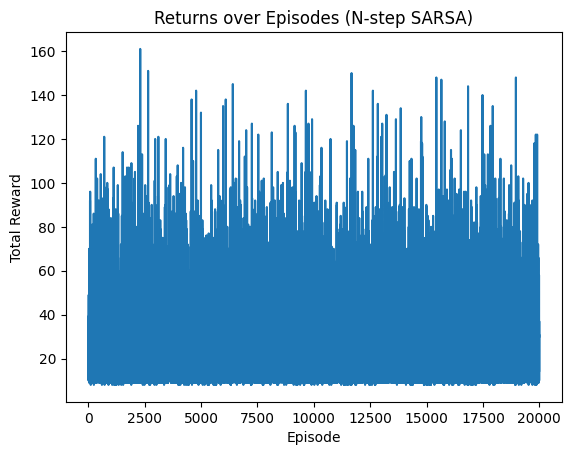

In [21]:
# Main code
env = gym.make('CartPole-v1')

n = 0
num_episodes = 20000
alpha = 0.1
gamma = 0.90
epsilon = 0.2

q_table, returns = n_step_sarsa_cartpole(env, n=n, num_episodes=num_episodes, alpha=alpha, gamma=gamma)

plot_returns(returns)

# n = 2

Episode 1000: Total Reward: 24.0
Episode 2000: Total Reward: 26.0
Episode 3000: Total Reward: 41.0
Episode 4000: Total Reward: 11.0
Episode 5000: Total Reward: 38.0
Episode 6000: Total Reward: 10.0
Episode 7000: Total Reward: 32.0
Episode 8000: Total Reward: 11.0
Episode 9000: Total Reward: 37.0
Episode 10000: Total Reward: 48.0
Episode 11000: Total Reward: 11.0
Episode 12000: Total Reward: 23.0
Episode 13000: Total Reward: 38.0
Episode 14000: Total Reward: 50.0
Episode 15000: Total Reward: 26.0
Episode 16000: Total Reward: 59.0
Episode 17000: Total Reward: 11.0
Episode 18000: Total Reward: 39.0
Episode 19000: Total Reward: 95.0
Episode 20000: Total Reward: 14.0


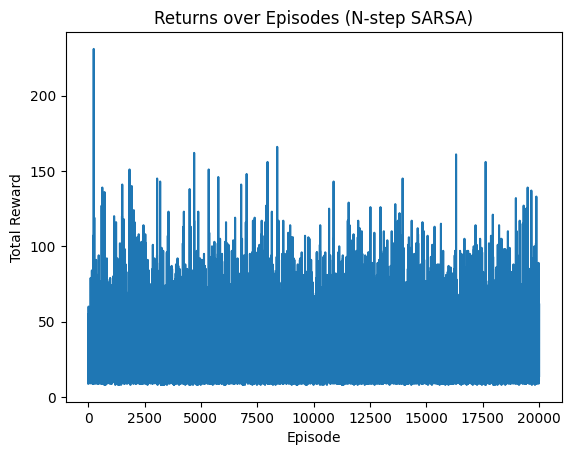

In [22]:
# Main code
env = gym.make('CartPole-v1')

n = 2
num_episodes = 20000
alpha = 0.1
gamma = 0.90
epsilon = 0.2

q_table, returns = n_step_sarsa_cartpole(env, n=n, num_episodes=num_episodes, alpha=alpha, gamma=gamma)

plot_returns(returns)

# n = 4

Episode 1000: Total Reward: 32.0
Episode 2000: Total Reward: 11.0
Episode 3000: Total Reward: 24.0
Episode 4000: Total Reward: 37.0
Episode 5000: Total Reward: 31.0
Episode 6000: Total Reward: 32.0
Episode 7000: Total Reward: 26.0
Episode 8000: Total Reward: 53.0
Episode 9000: Total Reward: 36.0
Episode 10000: Total Reward: 31.0
Episode 11000: Total Reward: 48.0
Episode 12000: Total Reward: 18.0
Episode 13000: Total Reward: 44.0
Episode 14000: Total Reward: 29.0
Episode 15000: Total Reward: 109.0
Episode 16000: Total Reward: 34.0
Episode 17000: Total Reward: 57.0
Episode 18000: Total Reward: 13.0
Episode 19000: Total Reward: 29.0
Episode 20000: Total Reward: 38.0


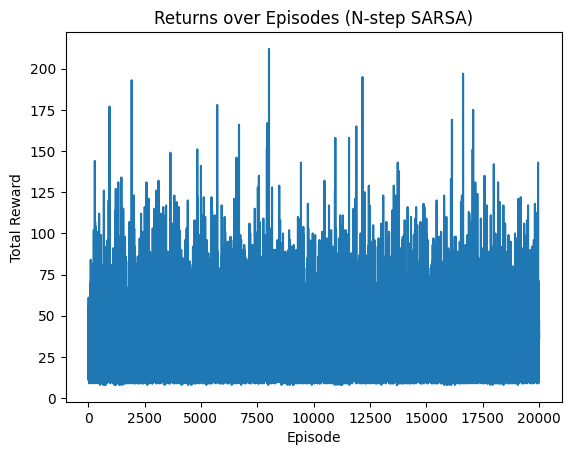

In [23]:
# Main code
env = gym.make('CartPole-v1')

n = 4
num_episodes = 20000
alpha = 0.1
gamma = 0.90
epsilon = 0.2

q_table, returns = n_step_sarsa_cartpole(env, n=n, num_episodes=num_episodes, alpha=alpha, gamma=gamma)

plot_returns(returns)

# Sarsa lambda implementation - Pendulum environment

In [35]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Create bins for each dimension of the state space
def create_bins(env, num_bins=10):
    bins = []
    for i in range(env.observation_space.shape[0]):
        low = env.observation_space.low[i]
        high = env.observation_space.high[i]
        bins.append(np.linspace(low, high, num_bins - 1))
    return bins

# Function to discretize state space
def discretize_state(state, bins):
    state_idx = tuple(
        min(len(bins[i]) - 1, max(0, np.digitize(state[i], bins[i]) - 1)) for i in range(len(state))
    )
    return state_idx

# Function to discretize action space
def discretize_action(action, action_bins):
    return np.digitize(action, action_bins) - 1  # Return action index

# Epsilon-greedy action selection
def get_action(state_idx, q_table, num_actions, epsilon, action_bins):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)  # Random action (exploration)
    else:
        return np.argmax(q_table[state_idx])  # Greedy action (exploitation)

# SARSA(λ) algorithm
def sarsa_lambda_pendulum(env, lambda_val=0.9, num_bins=10, num_episodes=20000, alpha=0.1, gamma=0.95):
    bins = create_bins(env, num_bins)
    action_bins = np.linspace(-2.0, 2.0, 10)  # Discretize torque actions into 10 bins
    num_actions = len(action_bins)  # Number of possible torque actions (discretized)

    # Initialize Q-table and eligibility traces
    q_table = np.zeros([num_bins] * env.observation_space.shape[0] + [num_actions])
    e_table = np.zeros_like(q_table)

    returns = []  # Track returns for each episode

    for episode in range(num_episodes):
        # Set epsilon to 1 for the first 100 episodes, then switch to 0.2
        epsilon = 1 if episode < 100 else 0.2

        state, _ = env.reset()
        state_idx = discretize_state(state, bins)
        action = np.random.uniform(-2.0, 2.0)  # Random action (torque)

        # Discretize the action
        action_idx = discretize_action(action, action_bins)

        # Initialize storage for the last steps
        total_reward = 0
        t = 0
        done = False

        while not done:
            # Apply action and observe the result
            next_state, reward, terminated, truncated, _ = env.step([action])
            next_state_idx = discretize_state(next_state, bins)

            # Select the next action (using epsilon-greedy)
            next_action_idx = get_action(next_state_idx, q_table, num_actions, epsilon, action_bins)
            next_action = action_bins[next_action_idx]

            # Calculate TD error
            td_error = reward + gamma * q_table[next_state_idx][next_action_idx] - q_table[state_idx][action_idx]
            e_table[state_idx][action_idx] += 1  # Update eligibility trace for the current state-action pair

            # Update Q-values and eligibility traces
            q_table[state_idx][action_idx] += alpha * td_error * e_table[state_idx][action_idx]
            e_table = gamma * lambda_val * e_table  # Decay eligibility traces

            # Update state and action
            state_idx = next_state_idx
            action_idx = next_action_idx
            action = next_action

            # Accumulate total reward for the episode
            total_reward += reward

            if terminated or truncated:
                done = True

            t += 1

        # Store the total reward for this episode
        returns.append(total_reward)

        # # Print progress every 1000 episodes
        # if (episode + 1) % 1000 == 0:
        #     print(f"Episode {episode + 1}: Total Reward: {total_reward}")

    return q_table, returns

# Plotting function
def plot_returns(returns):
    plt.plot(returns)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Returns over Episodes (SARSA(λ))')
    plt.show()


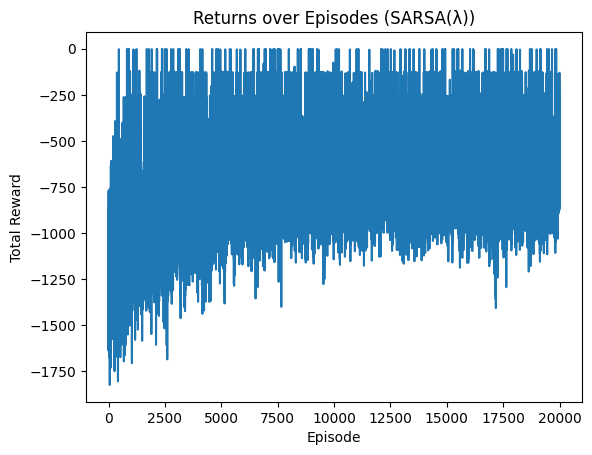

In [36]:
# Create the Pendulum environment
env = gym.make("Pendulum-v1", render_mode="rgb_array", g=9.81)  # Default g=10.0

# Set the parameters for the SARSA(λ) algorithm
lambda_val = 0.9  # Lambda for SARSA(λ)
num_bins = 10     # Number of bins for state discretization
num_episodes = 20000  # Number of episodes to train
alpha = 0.1       # Learning rate
gamma = 0.95      # Discount factor

# Run the SARSA(λ) algorithm
q_table, returns = sarsa_lambda_pendulum(
    env,
    lambda_val=lambda_val,
    num_bins=num_bins,
    num_episodes=num_episodes,
    alpha=alpha,
    gamma=gamma
)

# Plot the returns over episodes
plot_returns(returns)